In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from spacepy import coordinates as coord
from spacepy.time import Ticktock

In [2]:
base_f_loc = '/storage/silver/stfc_cg/hf832176/data/THEMIS/'

# <center> Read in Data </center>

In [3]:
!ls {base_f_loc}*.pkl

/storage/silver/stfc_cg/hf832176/data/THEMIS/tha_esa_energy_levels.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/tha_mag.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/tha.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/tha_sst_energy_levels.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/thb_mag.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/thb.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/thc_mag.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/thc.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/thd_mag.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/thd.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/the_mag.pkl
/storage/silver/stfc_cg/hf832176/data/THEMIS/the.pkl


In [ ]:
dawn_f2 = pd.read_pickle(base_f_loc+'dawn_f2')
dawn_f2 = pd.read_pickle(base_f_loc+'dusk_f2')

In [4]:
e_levs_sst = pd.read_pickle(base_f_loc+'tha_sst_energy_levels.pkl')
display(e_levs_sst.T)
e_levs_esa = pd.read_pickle(base_f_loc+'tha_esa_energy_levels.pkl')
display(e_levs_esa.T)

e_levs = [i for i in e_levs_esa.index[::-1]]+[i for i in e_levs_sst.index]
# display(e_levs)

,31000.0,41000.0,52000.0,65500.0,93000.0,139000.0,203500.0,293000.0,408000.0,561500.0,719500.0,NaN,NaN,NaN,NaN,NaN
eV,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


,31766.636719,26831.396484,20383.251953,15484.854492,11763.428711,8936.366211,6788.923828,5157.255371,3917.749512,2976.849854,...,83.861748,63.502251,48.474998,36.841000,28.115499,20.844250,15.996750,12.603500,9.210250,7.271250
eV,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31


In [17]:
e_levs2 = e_levs.copy()
e_levs2 = e_levs2[:31] + e_levs2[32:-5]

In [18]:
dawn_f3 = dawn_f2.copy()
# Replacing 0 with np.nan in relevant columns
dawn_f3[dawn_f3.loc[:,dawn_f3.columns[71:]] == 0] = np.nan
# Dropping nans in relevant columns
dawn_f3 = dawn_f3.dropna(subset=dawn_f2.columns[71:])

dusk_f3 = dusk_f2.copy()
# Replacing 0 with np.nan in relevant columns
dusk_f3[dusk_f3.loc[:,dusk_f3.columns[71:]] == 0] = np.nan
# Dropping nans in relevant columns
dusk_f3 = dusk_f3.dropna(subset=dusk_f2.columns[71:])

In [20]:
nfloc = '/storage/silver/stfc_cg/shared/themis_lstar/'

#######

da_lcds = pd.read_csv(nfloc+'for_teo.csv')

da_lcds.index = [dt.datetime.strptime(i, '%d/%m/%Y %H:%M')
                 for i in da_lcds.time]
da_lcds = da_lcds.drop(['time','0','mlt'],axis=1)

da_lcds['counts'] = da_lcds.isnull().sum(axis=1).tolist()
da_lcds['in_out'] = [False if i >= 5 else True
                     for i in da_lcds.counts]

#######

du_lcds = pd.read_csv(nfloc+'for_teo_dusk.csv')

du_lcds.index = [dt.datetime.strptime(i, '%d/%m/%Y %H:%M')
                 for i in du_lcds['Unnamed: 0']]
du_lcds = du_lcds.drop(['Unnamed: 0','0','mlt'],axis=1)

du_lcds['counts'] = du_lcds.isnull().sum(axis=1).tolist()
du_lcds['in_out'] = [False if i >= 5 else True
                     for i in du_lcds.counts]

In [21]:
dawn_f3['in_ms'] = da_lcds['in_out']
dusk_f3['in_ms'] = du_lcds['in_out']

# <center> Plotting Data </center>

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sbn

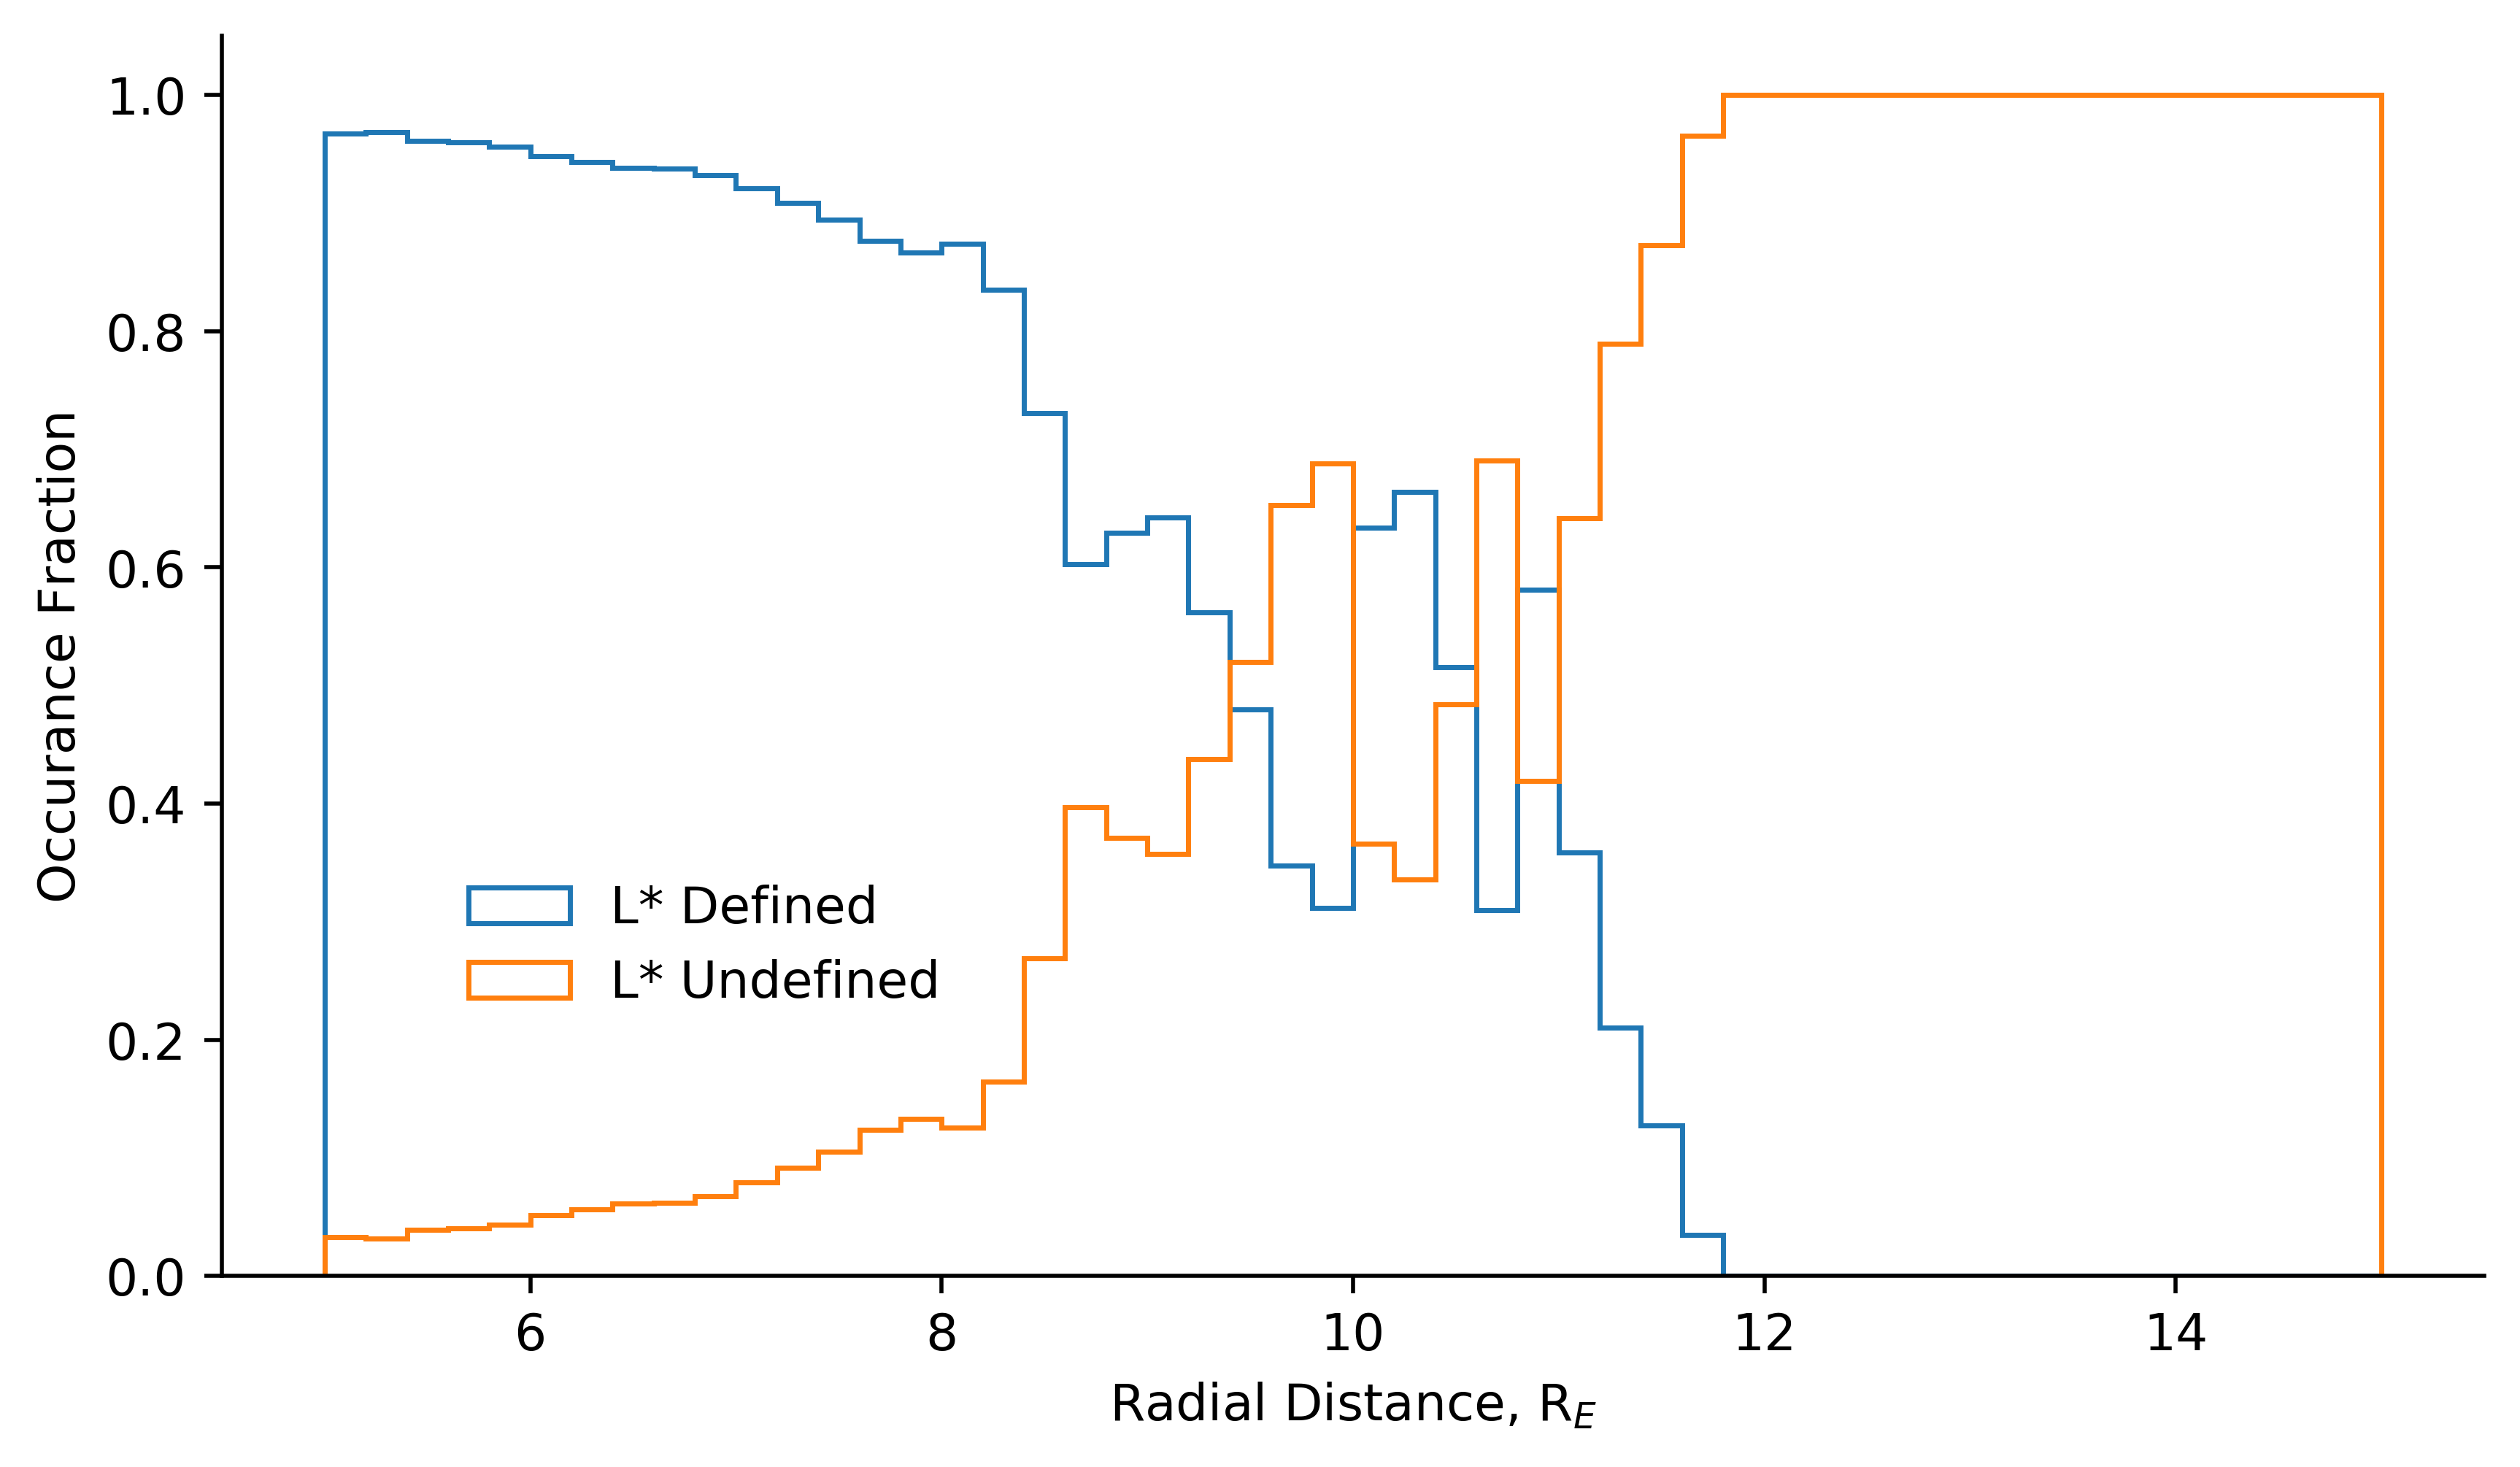

In [55]:
# Plotting distributions of the radial distance.
fig = plt.figure(figsize=(8,4.5),dpi=500)
ax1 = plt.subplot(111)

n,bins = np.histogram(dawn_f3['pos_r_mag'],bins=50,range=(5,15))
nin,binin = np.histogram(dawn_f3[dawn_f3.in_ms==True]['pos_r_mag'],bins=50,range=(5,15))
nou,binou = np.histogram(dawn_f3[dawn_f3.in_ms==False]['pos_r_mag'],bins=50,range=(5,15))

ax1.hist(bins[:-1],bins,weights=nin/n,
         histtype='step',label='L* Defined')
ax1.hist(bins[:-1],bins,weights=nou/n,
         histtype='step',label='L* Undefined')


ax1.legend(loc=(0.1,0.2),frameon=False)
ax1.set_ylabel('Occurance Fraction')
ax1.set_xlabel('Radial Distance, R$_E$')

sbn.despine()

path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/write_up/'
plt.savefig(fname = path+'lstar_r_dist.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'lstar_r_dist.eps',format='eps',bbox_inches='tight')
plt.savefig(fname = path+'lstar_r_dist.png',format='png',bbox_inches='tight')

plt.show()
# plt.close(fig)

In [37]:
da_med_in = dawn_f3[dawn_f3.in_ms==True].iloc[:,71:-1].median()
da_med_out = dawn_f3[dawn_f3.in_ms==False].iloc[:,71:-1].median()
du_med_in = dusk_f3[dusk_f3.in_ms==True].iloc[:,71:-1].median()
du_med_out = dusk_f3[dusk_f3.in_ms==False].iloc[:,71:-1].median()

da_in_qu = dawn_f3[dawn_f3.in_ms==True].iloc[:,71:-1].quantile(0.75)
da_in_ql = dawn_f3[dawn_f3.in_ms==True].iloc[:,71:-1].quantile(0.25)
da_out_qu = dawn_f3[dawn_f3.in_ms==False].iloc[:,71:-1].quantile(0.75)
da_out_ql = dawn_f3[dawn_f3.in_ms==False].iloc[:,71:-1].quantile(0.25)
du_in_qu = dusk_f3[dusk_f3.in_ms==True].iloc[:,71:-1].quantile(0.75)
du_in_ql = dusk_f3[dusk_f3.in_ms==True].iloc[:,71:-1].quantile(0.25)
du_out_qu = dusk_f3[dusk_f3.in_ms==False].iloc[:,71:-1].quantile(0.75)
du_out_ql = dusk_f3[dusk_f3.in_ms==False].iloc[:,71:-1].quantile(0.25)

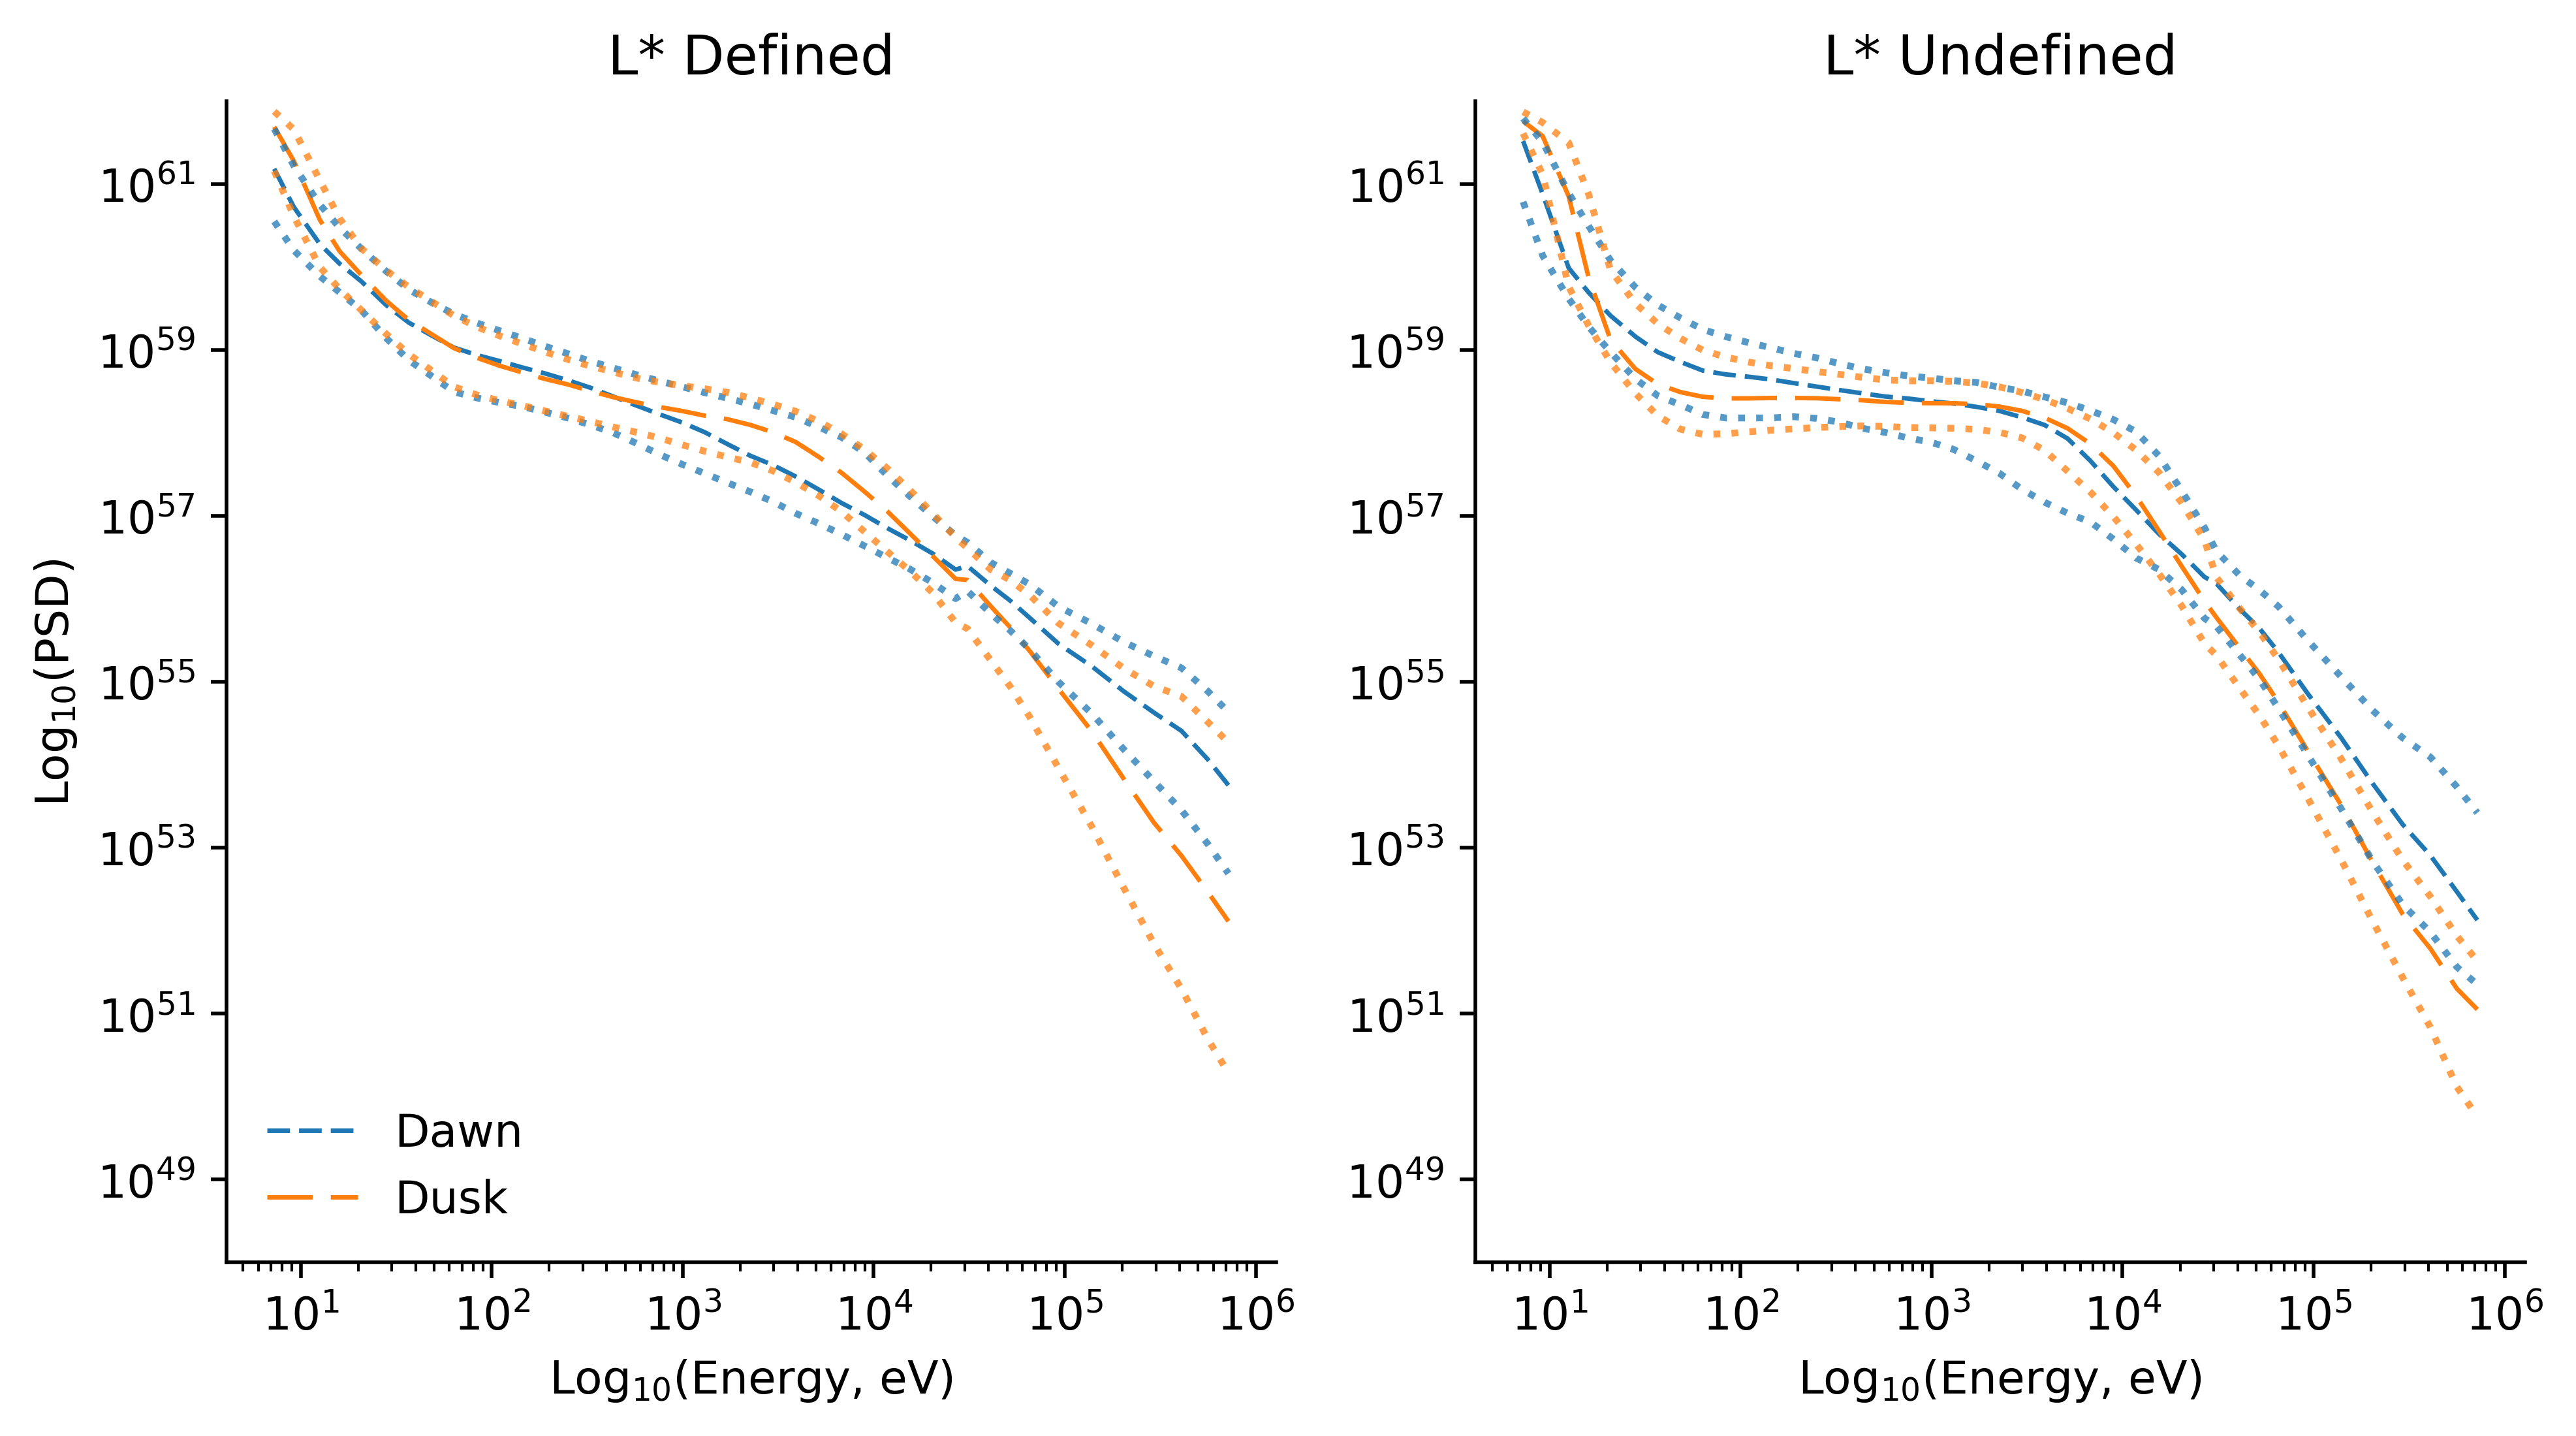

In [57]:
fig = plt.figure(figsize=(8,4.5),dpi=500)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(e_levs2,da_med_in,c='C0',label='Dawn',
         linewidth=1,linestyle='--',dashes=(5,2))
ax1.plot(e_levs2,du_med_in,c='C1',label='Dusk',
         linewidth=1,linestyle='--',dashes=(10,4))

ax1.plot(e_levs2,da_in_qu,c='C0',linestyle=':',alpha=0.75)
ax1.plot(e_levs2,da_in_ql,c='C0',linestyle=':',alpha=0.75)
ax1.plot(e_levs2,du_in_qu,c='C1',linestyle=':',alpha=0.75)
ax1.plot(e_levs2,du_in_ql,c='C1',linestyle=':',alpha=0.75)

ax1.set_title('L* Defined')
ax1.set_ylabel('Log$_{10}$(PSD)')
ax1.set_xlabel('Log$_{10}$(Energy, eV)')
ax1.set_ylim(1e+48,1e+62)
ax1.set_yscale('log')
ax1.set_xscale('log')

################

ax2.plot(e_levs2,da_med_out,c='C0',linewidth=1,linestyle='--',dashes=(5,2))
ax2.plot(e_levs2,du_med_out,c='C1',linewidth=1,linestyle='--',dashes=(10,4))

ax2.plot(e_levs2,da_out_qu,c='C0',linestyle=':',alpha=0.75)
ax2.plot(e_levs2,da_out_ql,c='C0',linestyle=':',alpha=0.75)
ax2.plot(e_levs2,du_out_qu,c='C1',linestyle=':',alpha=0.75)
ax2.plot(e_levs2,du_out_ql,c='C1',linestyle=':',alpha=0.75)

ax2.set_title('L* Undefined')
# ax2.set_ylabel('Log$_{10}$(PSD)')
ax2.set_xlabel('Log$_{10}$(Energy, eV)')
ax2.set_ylim(1e+48,1e+62)
ax2.set_yscale('log')
ax2.set_xscale('log')

sbn.despine()
plt.tight_layout()
ax1.legend(loc='lower left',frameon=False)

path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/write_up/'
plt.savefig(fname = path+'PSDvE_inout_avg.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_inout_avg.eps',format='eps',bbox_inches='tight')
plt.savefig(fname = path+'PSDvE_inout_avg.png',format='png',bbox_inches='tight')

plt.show()
# plt.close(fig)

In [55]:
EvR_da.columns

Index(['pos_r_mag', 'E_11_psd'], dtype='object')

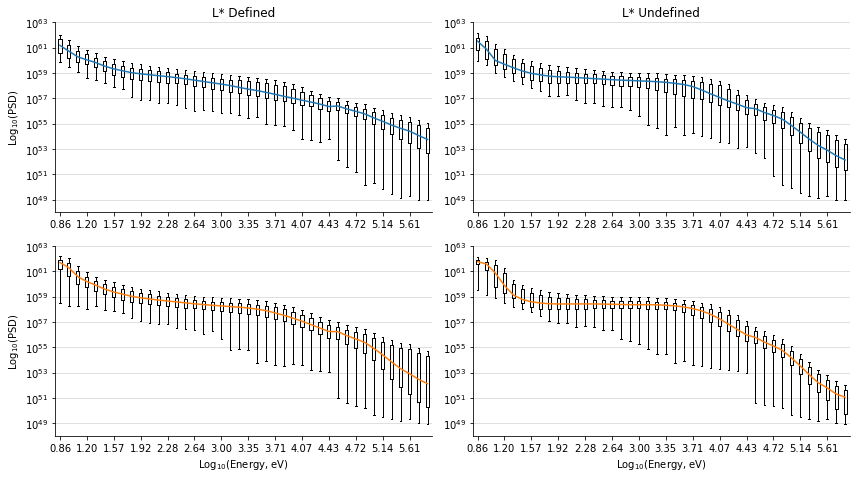

In [58]:
# Plotting boxplots of log10(DEF) for all energies.
plt.figure(figsize=(12,4.5*1.5))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

medianprops = dict(linewidth=0)
ax1.boxplot(dawn_f3[dawn_f3.in_ms==True].iloc[:,71:-1].values,widths=0.35,sym='',
            medianprops=medianprops)
ax1.plot(np.arange(1,43,1),dawn_f3[dawn_f3.in_ms==True].iloc[:,71:-1].median(),c='C0')

ax1.grid(axis='y',alpha=0.5)

ax1.set_title('L* Defined')
ax1.set_ylabel('Log$_{10}$(PSD)')
# plt.xlabel('Log$_{10}$(Energy)')
ax1.set_xticks(np.arange(1,43,3))
ax1.set_xticklabels(["{0:.2f}".format(i) for i in np.log10(e_levs2[::3])])
ax1.set_ylim(1e+48,1e+63)
ax1.set_yscale('log')

#######

ax2.boxplot(dawn_f3[dawn_f3.in_ms==False].iloc[:,71:-1].values,widths=0.35,sym='',
            medianprops=medianprops)
ax2.plot(np.arange(1,43,1),dawn_f3[dawn_f3.in_ms==False].iloc[:,71:-1].median(),c='C0')

ax2.grid(axis='y',alpha=0.5)

ax2.set_title('L* Undefined')
# ax2.set_ylabel('Log$_{10}$(PSD)')
# ax2.set_xlabel('Log$_{10}$(Energy, eV)')
ax2.set_xticks(np.arange(1,43,3))
ax2.set_xticklabels(["{0:.2f}".format(i) for i in np.log10(e_levs2[::3])])
ax2.set_ylim(1e+48,1e+63)
ax2.set_yscale('log')

#######

ax3.boxplot(dusk_f3[dusk_f3.in_ms==True].iloc[:,71:-1].values,widths=0.35,sym='',
            medianprops=medianprops)
ax3.plot(np.arange(1,43,1),dusk_f3[dusk_f3.in_ms==True].iloc[:,71:-1].median(),c='C1')

ax3.grid(axis='y',alpha=0.5)

ax3.set_ylabel('Log$_{10}$(PSD)')
ax3.set_xlabel('Log$_{10}$(Energy, eV)')
ax3.set_xticks(np.arange(1,43,3))
ax3.set_xticklabels(["{0:.2f}".format(i) for i in np.log10(e_levs2[::3])])
ax3.set_ylim(1e+48,1e+63)
ax3.set_yscale('log')

#######

ax4.boxplot(dusk_f3[dusk_f3.in_ms==False].iloc[:,71:-1].values,widths=0.35,sym='',
            medianprops=medianprops)
ax4.plot(np.arange(1,43,1),dusk_f3[dusk_f3.in_ms==False].iloc[:,71:-1].median(),c='C1')

ax4.grid(axis='y',alpha=0.5)

ax4.set_xlabel('Log$_{10}$(Energy, eV)')
ax4.set_xticks(np.arange(1,43,3))
ax4.set_xticklabels(["{0:.2f}".format(i) for i in np.log10(e_levs2[::3])])
ax4.set_ylim(1e+48,1e+63)
ax4.set_yscale('log')

plt.tight_layout()
sbn.despine()

path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/write_up/'
plt.savefig(fname = path+'PSDvE_inout_box.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_dd_avg.eps',format='eps',bbox_inches='tight')
plt.savefig(fname = path+'PSDvE_inout_box.png',format='png',bbox_inches='tight')

plt.show()

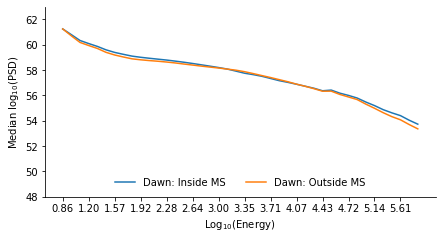

In [79]:
# Plot of median DEF per energy channel
plt.figure(figsize=(7,3.5))

plt.plot([i for i in range(len(e_levs2))],
        [np.log10(dawn_f3[dawn_f3.in_ms==True][i].median())
         for i in dawn_f3.columns[71:-1]],
        label='Dawn: Inside MS')
plt.plot([i for i in range(len(e_levs2))],
        [np.log10(dawn_f3[dawn_f3.in_ms==False][i].median())
         for i in dawn_f3.columns[71:-1]],
        label='Dawn: Outside MS',alpha=1)

plt.legend(loc='lower center',ncol=2,frameon=False)
plt.ylabel('Median log$_{10}$(PSD)')
plt.xlabel('Log$_{10}$(Energy)')

plt.ylim(48,63)
tick_l = ["{0:.2f}".format(i) for i in np.log10(e_levs2)]
t_loc = [i for i in range(len(e_levs2))]
plt.xticks(ticks=t_loc[::3],labels=tick_l[::3])
sbn.despine()
plt.show()

# <center> Kolmogorov-Smirnov Statistic </center>

In [67]:
from scipy.stats import ks_2samp as kss

In [117]:
# Critical KS stat at the p={0.05,0.001} level
ks_crit5 = 1.36*np.sqrt(2*len(dawn_f3)/(len(dawn_f3)**2))
ks_crit01 = 1.95*np.sqrt(2*len(dawn_f3)/(len(dawn_f3)**2))
print(ks_crit5,ks_crit01)

# If stat > critical value then distributions are different.

0.01275127643677288 0.01828308018507876


In [83]:
ks_df = pd.DataFrame(index = [i for i in dawn_f3.columns[71:-1]],
                     columns=['stat','p-val'])

ks_df['stat'] = [kss(dawn_f3[dawn_f3.in_ms==True][i],
                     dawn_f3[dawn_f3.in_ms==False][i])[0]
                 for i in dawn_f3.columns[71:-1]]
ks_df['p-val'] = [kss(dawn_f3[dawn_f3.in_ms==True][i],
                      dawn_f3[dawn_f3.in_ms==False][i])[1]
                  for i in dawn_f3.columns[71:-1]]
ks_df['p-val'] = ['<1e-10' if i < 1e-10 else i for i in ks_df['p-val']]
ks_df.describe()

,stat
count,42.000000
mean,0.085916
std,0.035509
min,0.022448
25%,0.049362
50%,0.095266
75%,0.119300
max,0.128799


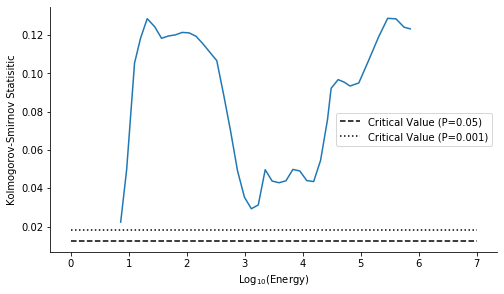

In [126]:
plt.figure(figsize=(8,4.5))
plt.plot([np.log10(i) for i in e_levs2],ks_df.stat)
plt.plot([0,7],[ks_crit5,ks_crit5],'k--',label='Critical Value (P=0.05)')
plt.plot([0,7],[ks_crit01,ks_crit01],'k:',label='Critical Value (P=0.001)')

plt.ylabel('Kolmogorov-Smirnov Statisitic')
plt.xlabel('Log$_{10}$(Energy)')
plt.legend()
sbn.despine()
plt.show()

# <center> Anderson-Darlin Test </center>

In [71]:
from scipy.stats import anderson_ksamp as adt

In [127]:
# AD stat critical values for
# P={0.25,0.10,0.05,0.025,0.01,0.005,0.001}

AD_crit = adt([dusk_f3[dusk_f3.in_ms==True].iloc[:,71],
               dusk_f3[dusk_f3.in_ms==False].iloc[:,71]])[1]

# If AD stat > crit value, different dists

<ipython-input-127-90f15396ecbf>:4: UserWarning: p-value floored: true value smaller than 0.001
  AD_crit = adt([dusk_f3[dusk_f3.in_ms==True].iloc[:,71],


In [128]:
# ad_df = pd.DataFrame(index = [i for i in dusk_f2.columns[70:]],
#                      columns=['stat','p-val'])

# ad_df['stat'] = [adt([dawn_f2[i],dusk_f2[i]])[0] for i in dusk_f2.columns[70:]]
# # ad_df['crit val'] = [adt([dawn[i],dusk[i]])[1] for i in dusk.columns[0:11]]
# ad_df['p-val'] = [adt([dawn_f2[i],dusk_f2[i]])[2] for i in dusk_f2.columns[70:]]
# ad_df['p-val'] = ['<1e-10' if i < 1e-10 else i for i in ad_df['p-val']]
# # ad_df

In [129]:
ad_df = pd.DataFrame(index = [i for i in dawn_f3.columns[71:-1]],
                     columns=['stat','p-val'])

ad_df['stat'] = [adt([dawn_f3[dawn_f3.in_ms==True][i],
                     dawn_f3[dawn_f3.in_ms==False][i]])[0]
                 for i in dawn_f3.columns[71:-1]]
ad_df['p-val'] = [adt([dawn_f3[dawn_f3.in_ms==True][i],
                      dawn_f3[dawn_f3.in_ms==False][i]])[2]
                  for i in dawn_f3.columns[71:-1]]
ad_df['p-val'] = ['<1e-10' if i < 1e-10 else i for i in ad_df['p-val']]
ad_df.describe()

<ipython-input-129-7c1346942b35>:4: UserWarning: p-value floored: true value smaller than 0.001
  ad_df['stat'] = [adt([dawn_f3[dawn_f3.in_ms==True][i],
<ipython-input-129-7c1346942b35>:7: UserWarning: p-value floored: true value smaller than 0.001
  ad_df['p-val'] = [adt([dawn_f3[dawn_f3.in_ms==True][i],


,stat,p-val
count,42.000000,42.000000
mean,163.379747,0.001238
std,116.942798,0.001546
min,3.642058,0.001000
25%,39.262254,0.001000
50%,180.586370,0.001000
75%,272.717155,0.001000
max,331.365060,0.011016


In [131]:
AD_crit

array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546])

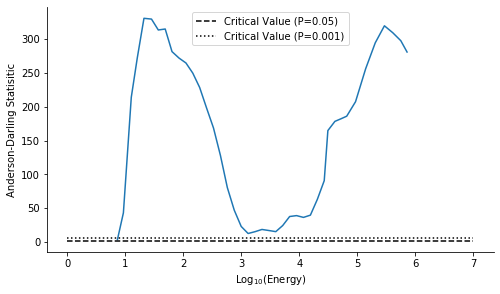

In [130]:
plt.figure(figsize=(8,4.5))
plt.plot([np.log10(i) for i in e_levs2],ad_df.stat)
plt.plot([0,7],[AD_crit[2],AD_crit[2]],'k--',label='Critical Value (P=0.05)')
plt.plot([0,7],[AD_crit[-1],AD_crit[-1]],'k:',label='Critical Value (P=0.001)')

plt.ylabel('Anderson-Darling Statisitic')
plt.xlabel('Log$_{10}$(Energy)')
plt.legend()
sbn.despine()
plt.show()

# <center> How Many B-Field Models? </center>

In [138]:
display(da_lcds.describe())
display(du_lcds.describe())

,T89,OPQUIET,T96,OSTA,T01STORM,T05,counts
count,18528.000000,19530.000000,10881.000000,10382.000000,10852.000000,10451.000000,22751.000000
mean,6.530875,6.554410,6.582648,6.619871,6.762917,6.512507,2.456244
std,1.088267,1.127925,1.119389,1.138086,1.151979,1.095145,2.313878
min,4.431754,4.682661,4.352881,4.555142,4.588935,4.493635,0.000000
25%,5.642553,5.649333,5.662845,5.691452,5.804999,5.599296,0.000000
50%,6.395922,6.389779,6.448514,6.461096,6.658935,6.397323,4.000000
75%,7.301464,7.274203,7.402492,7.422249,7.623095,7.298247,4.000000
max,9.713323,9.866786,9.753539,10.233928,10.268541,10.322313,6.000000


,T89,OPQUIET,T96,OSTA,T01STORM,T05,counts
count,11389.000000,12367.000000,5632.000000,5833.000000,3885.000000,3638.000000,34328.000000
mean,7.460630,7.510034,7.307218,7.483396,7.088412,6.894768,4.754836
std,1.468743,1.422274,1.378740,1.454306,1.466948,1.473084,1.858143
min,4.465755,4.607026,4.324893,4.515027,4.499320,4.445193,0.000000
25%,6.155569,6.260106,6.059398,6.221312,5.686827,5.480506,4.000000
50%,7.826441,8.002429,7.675158,7.838200,7.148101,6.839802,6.000000
75%,8.835227,8.664781,8.410791,8.598194,8.404716,8.338082,6.000000
max,9.643260,9.757365,10.079522,18.877817,9.935725,10.534068,6.000000


In [147]:
# for j in range(1,7):
#     da_lcds['counts'] = da_lcds.isnull().sum(axis=1).tolist()
#     da_lcds['in_out'] = [False if i >= j else True
#                          for i in da_lcds.counts]
#     du_lcds['counts'] = du_lcds.isnull().sum(axis=1).tolist()
#     du_lcds['in_out'] = [False if i >= j else True
#                          for i in du_lcds.counts]
    
#     dawn_f3['in_ms'] = da_lcds['in_out']
#     dusk_f3['in_ms'] = du_lcds['in_out']
    
#     # Plotting distributions of the radial distance.
#     fig = plt.figure(figsize=(4,2.25),dpi=500)
#     ax1 = plt.subplot(111)

#     n,bins = np.histogram(dawn_f3['pos_r_mag'],bins=100,range=(5,15))
#     nin,binin = np.histogram(dawn_f3[dawn_f3.in_ms==True]['pos_r_mag'],bins=100,range=(5,15))
#     nou,binou = np.histogram(dawn_f3[dawn_f3.in_ms==False]['pos_r_mag'],bins=100,range=(5,15))

#     ax1.hist(bins[:-1],bins,weights=nin/n,
#              histtype='step',label='Inside')
#     ax1.hist(bins[:-1],bins,weights=nou/n,
#              histtype='step',label='Outside')

#     ax1.set_title('Models without L*:'+str(j))
#     ax1.legend(loc='upper left',frameon=False)
#     ax1.set_ylabel('Occurance Fraction')
#     ax1.set_xlabel('Radial Distance, R$_E$')

#     sbn.despine()

#     plt.show()

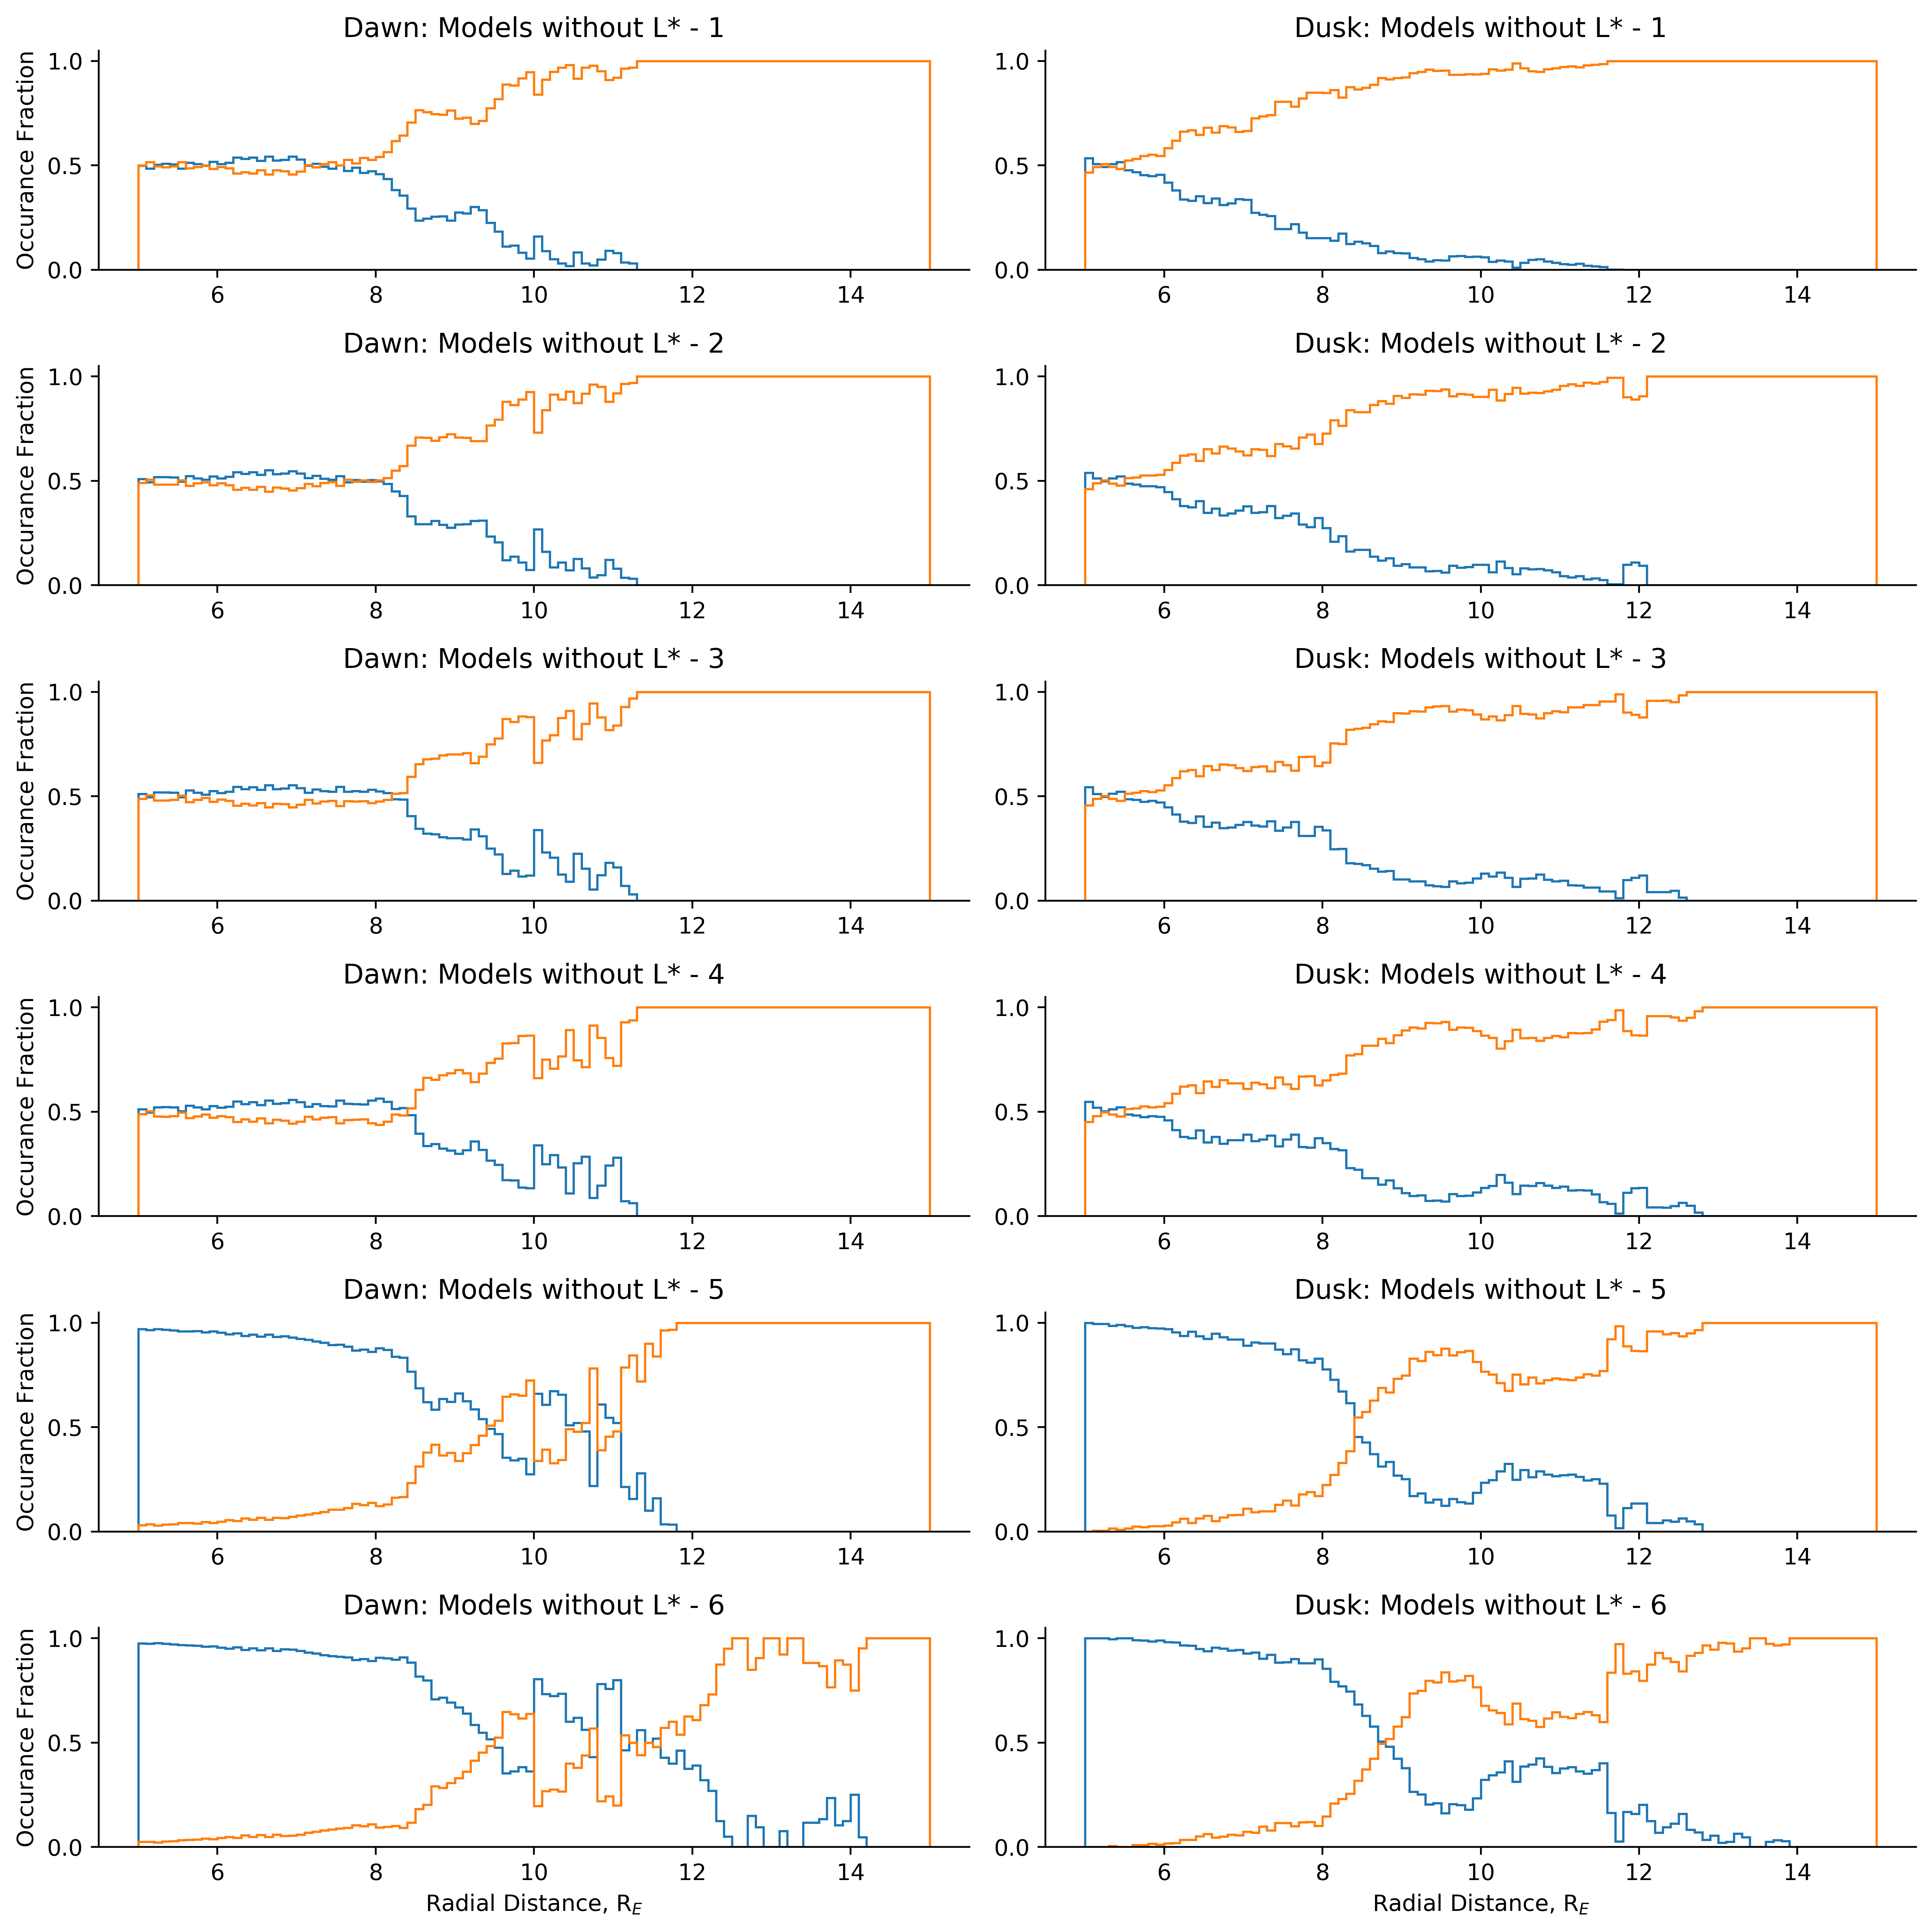

In [146]:
fig = plt.figure(figsize=(12,12),dpi=500)
axs = [plt.subplot(6,2,i+1) for i in range(12)]
for j in range(1,7):
    da_lcds['counts'] = da_lcds.isnull().sum(axis=1).tolist()
    da_lcds['in_out'] = [False if i >= j else True
                         for i in da_lcds.counts]
    du_lcds['counts'] = du_lcds.isnull().sum(axis=1).tolist()
    du_lcds['in_out'] = [False if i >= j else True
                         for i in du_lcds.counts]
    
    dawn_f3['in_ms'] = da_lcds['in_out']
    dusk_f3['in_ms'] = du_lcds['in_out']
    
    # Plotting distributions of the radial distance.
    n,bins = np.histogram(dawn_f3['pos_r_mag'],bins=100,range=(5,15))
    nin,binin = np.histogram(dawn_f3[dawn_f3.in_ms==True]['pos_r_mag'],bins=100,range=(5,15))
    nou,binou = np.histogram(dawn_f3[dawn_f3.in_ms==False]['pos_r_mag'],bins=100,range=(5,15))

    axs[(j-1)*2].hist(bins[:-1],bins,weights=nin/n,
             histtype='step',label='Inside')
    axs[(j-1)*2].hist(bins[:-1],bins,weights=nou/n,
             histtype='step',label='Outside')

    axs[(j-1)*2].set_title('Dawn: Models without L* - '+str(j))
       
    # Plotting distributions of the radial distance.
    n,bins = np.histogram(dusk_f3['pos_r_mag'],bins=100,range=(5,15))
    nin,binin = np.histogram(dusk_f3[dusk_f3.in_ms==True]['pos_r_mag'],bins=100,range=(5,15))
    nou,binou = np.histogram(dusk_f3[dusk_f3.in_ms==False]['pos_r_mag'],bins=100,range=(5,15))

    axs[2*j-1].hist(bins[:-1],bins,weights=nin/n,
             histtype='step',label='Inside')
    axs[2*j-1].hist(bins[:-1],bins,weights=nou/n,
             histtype='step',label='Outside')

    axs[2*j-1].set_title('Dusk: Models without L* - '+str(j))
       
ax1.legend(loc='upper left',frameon=False)
[i.set_ylabel('Occurance Fraction') for i in axs[::2]]
[i.set_xlabel('Radial Distance, R$_E$') for i in axs[10:]]

sbn.despine()
plt.tight_layout()

plt.show()